In [49]:
import os
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [50]:
%matplotlib inline

# Face Detection

In [51]:
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def save_np_image(np_image, file_path, file_name, gray=False):
    if gray:
        image = Image.fromarray(np.uint8(np_image), 'L')
    else:
        image = Image.fromarray(np.uint8(np_image))
    
    image.save(os.path.join(file_path, file_name))

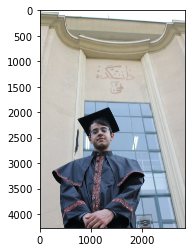

In [52]:
#Loading the image to be tested
file_name = "me2"
image = cv2.imread('./plots/face_detection/{}.jpeg'.format(file_name))
plt.imshow(convertToRGB(image))
plt.show()

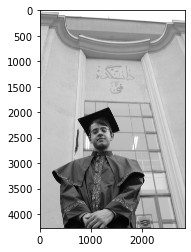

In [53]:
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(image_gray, cmap='gray')
plt.show()

In [54]:
haar_cascade_face = cv2.CascadeClassifier('./plots/haarcascade_frontalface_default.xml')

faces_rects = haar_cascade_face.detectMultiScale(image_gray, scaleFactor = 1.2, minNeighbors = 5);

print('Faces found: ', len(faces_rects))

Faces found:  1


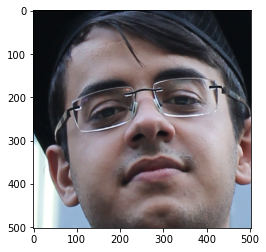

In [55]:
(x,y,w,h) = faces_rects[0]

img = image[y:y+h, x:x+w]

plt.imshow(convertToRGB(img))

img = Image.fromarray(np.uint8(convertToRGB(img)))
img.save("./plots/face_detection/{}_croped.jpeg".format(file_name))
ImageOps.grayscale(img).save("./plots/face_detection/{}_croped_gray.jpeg".format(file_name))

In [56]:
(x,y,w,h) = faces_rects[0]

img = image[y:y+h, x:x+w]
rgb_img = convertToRGB(img)

img_r = np.zeros(rgb_img.shape)
img_g = np.zeros(rgb_img.shape)
img_b = np.zeros(rgb_img.shape)

img_r[:, :, 0] = rgb_img[:, :, 0]
img_g[:, :, 1] = rgb_img[:, :, 1]
img_b[:, :, 2] = rgb_img[:, :, 2]

saving_file_path = "./plots/face_detection/"

save_np_image(img_r, saving_file_path, "{}_croped_red.jpeg".format(file_name))
save_np_image(img_g, saving_file_path, "{}_croped_green.jpeg".format(file_name))
save_np_image(img_b, saving_file_path, "{}_croped_blue.jpeg".format(file_name))

In [57]:
for ix, (x,y,w,h) in enumerate(faces_rects):
    if ix in [0]:
        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 10)

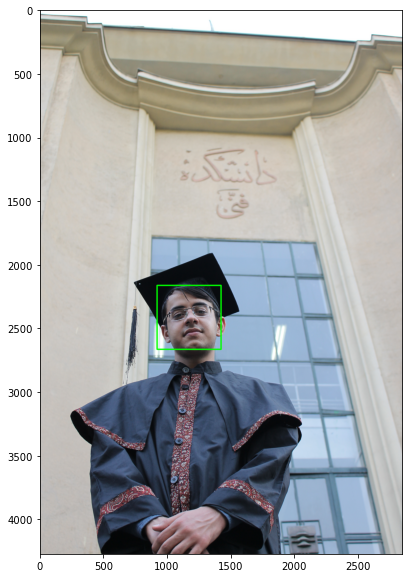

In [58]:
plt.figure(figsize=(10,10))
plt.imshow(convertToRGB(image))
plt.show()

img = Image.fromarray(np.uint8(convertToRGB(image)))
img.save("./plots/face_detection/{}_bbox.jpeg".format(file_name))

# Face Landmark

Refrence: https://gist.github.com/berak/1a00d195043780720ff2d495876f8fad

In [59]:
file_name="me2"
image = cv2.imread("./plots/face_detection/{}.jpeg".format(file_name))
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

haar_cascade_face = cv2.CascadeClassifier('./plots/haarcascade_frontalface_default.xml')

faces = haar_cascade_face.detectMultiScale(image_gray, scaleFactor = 1.2, minNeighbors = 5);

print("faces",faces)

faces [[ 918 2162  502  502]]


In [60]:
print("testing LBF")
obj = cv2.face.createFacemarkLBF()
obj.loadModel("./plots/lbfmodel.yaml")
ok, landmarks = obj.fit(image, faces)
# print ("landmarks LBF",ok, landmarks)


# print("testing AAM")
# obj = cv2.face.createFacemarkAAM()
# obj.loadModel("./plots/aam.xml")
# ok, landmarks = obj.fit(image, faces)
# print ("landmarks AAM",ok, landmarks)

# print("testing Kazemi")
# obj = cv2.face.createFacemarkKazemi()
# obj.loadModel("face_landmark_model.dat")
# ok, landmarks = obj.fit(img, faces)
# print ("landmarks Kazemi",ok, landmarks)

testing LBF


In [61]:
for landmark in landmarks[0][0]:
    x,y = landmark.tolist()
    x, y = int(x), int(y)
    image = cv2.circle(image, (x,y), radius=10, color=(0, 0, 255), thickness=-1)



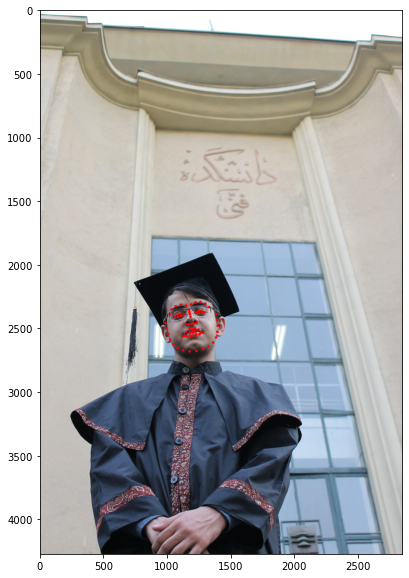

In [62]:
plt.figure(figsize=(10,10))
plt.imshow(convertToRGB(image))
plt.show()

save_np_image(image, "./plots/face_detection/", "{}_landmark.jpeg".format(file_name))